# <center><b> MGP1: Road Traffic Severity Classification Project <b></center>

---
<a name = Section0></a>
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>
 

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Information**](#Section41)
  - **4.2** [**Data Description**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Data Pre-profiling**](#Section51)<br>
  - **5.2** [**Handling of Missing Data**](#Section52)<br>
  - **5.3** [**Handling of Redundant Data**](#Section53)<br>
  - **5.4** [**Handling of Inconsisten Data**](#Section54)<br>
  - **5.5** [**Handling of Outliers**](#Section55)<br>
  
**6.** [**Exploratory Data Analysis**](#Section6)<br>
   
**7.** [**Data Post-Processing**](#Section7)<br>
  - **7.1** [**Data Encoding**](#Section71)<br> 
  - **7.2** [**Data Preparation**](#Section72)<br>
  - **7.3** [**Data Scaling**](#Section73)<br>

**8.** [**Model Development & Evaluation using Machine Learning**](#Section8)<br>
  - **8.1** [**Baseline Model Evaluation**](#Section81)<br> 
  - **8.2** [**SMOTE Oversampling for Multi-Class Classification**](#Section82)<br>

**9.** [**Model Evaluation using Hyperparameter Tuning**](#Section9)<br>

**10.** [**Summary**](#Section10)<br>
 

---
<a name = Section1></a>
# **1. Introduction**
---


- This data set is collected from Addis Ababa Sub-city police departments for master's research work. The data set has been prepared from manual records of road traffic accidents of the year 2017-20. 

- All the sensitive information has been excluded during data encoding and finally it has 32 features and 12316 instances of the accident. Then it is preprocessed and for identification of major causes of the accident by analyzing it using different machine learning classification algorithms. 

---
<a name = Section1></a>
# **2. Problem Statement**
---


- The target feature is Accident_severity which is a multi-class variable. 

- The task is to classify this variable based on the other 31 features step-by-step by going through each day's task.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**                                                   
---

In [1]:
import numpy as np
from numpy import isnan
import pandas as pd
from pandas_profiling import ProfileReport     
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter  
import seaborn as sns
import warnings                                                     
warnings.filterwarnings("ignore")
import datetime
plt.show();
from platform import python_version
import sklearn.metrics
from tqdm import tqdm
import gc
from sklearn.metrics import roc_curve, auc
import urllib
from urllib.request import urlopen
import urllib.request as ur

In [2]:
pd.set_option('display.max_columns', None)                          
pd.set_option('display.max_rows', None)                             
pd.set_option('mode.chained_assignment', None)   
sns.set_style('darkgrid')

In [3]:
from sklearn.preprocessing import StandardScaler                    
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV              
from sklearn.metrics import classification_report,plot_confusion_matrix
#import pydotplus                                                    
from IPython.display import Image                                   
from sklearn.metrics import accuracy_score                          
from sklearn.metrics import precision_score                         
from sklearn.metrics import recall_score                            
from sklearn.metrics import precision_recall_curve                  
from sklearn.metrics import confusion_matrix                        
from sklearn.metrics import f1_score                                  
from sklearn.metrics import roc_curve                               
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split                   
from sklearn.linear_model import LogisticRegression                 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel       
from sklearn.ensemble import RandomForestClassifier               
from yellowbrick.model_selection import FeatureImportances  
from imblearn.over_sampling import SMOTE
import shap

<a name = Section31></a>
### **3.2 Version Check**

In [4]:
# Printing versions of Python and other packages  to ensure correct version is used for this project
print("python version", python_version())
print ("pandas version", pd.__version__)
print ("numpy version", np.__version__)
print ("seaborn version", sns.__version__)
print ("sklearn version", sklearn.__version__)

python version 3.8.8
pandas version 1.2.2
numpy version 1.20.1
seaborn version 0.11.1
sklearn version 1.0.2


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


|Dataset| Records | Features | Dataset Size |
| :--: | :--: | :--: | :--: |
|**RTA data**| 12316 | 32 | 3 MB |


|Id|Features|Description||Id|Features|Description|
|:--|:--|:--||:--|:--|:--|
|01|**Time**|Time when accident occured||17|**Light_conditions**|Light prevailing at the time of accident||
|02|**Age_band_of_driver**|Age fof the driver||18|**Weather_conditions**|Weather prevailing at the time of accident||
|03|**Sex_of_driver**|Gender of the driver||19|**Type_of_collision**|Collision type||
|04|**Educational_level**|Education level of driver||20|**Number_of_vehicles_involved**|No of Vehicles involved in accident||
|05|**Vehicle_driver_relation**|Relationship of driver and vehicle driving||21|**Number_of_casualties**|No of casualties||
|06|**Driving_experience**|Drivers Experience||22|**Vehicle_movement**|Vehicle movement||
|07|**Type_of_vehicle**|Vehicle Type||23|**Casualty_class**|Class of casualty||
|08|**Owner_of_vehicle**|Vehicle Owner||24|**Sex_of_casualty**|Sex of casualty||
|09|**Service_year_of_vehicle**|Service year||25|**Age_band_of_casualty**|Age band of people with casualty||
|10|**Defect_of_vehicle**|Vehicle defects||26|**Casualty_severity**|Severity of casualty||
|11|**Area_accident_occured**|Area of accident||27|**Work_of_casuality**|Injured person occupation||
|12|**Lanes_or_Medians**|Which lane or median||28|**Fitness_of_casuality**|Injured person fitness||
|13|**Road_allignment**|Service year||29|**Pedestrian_movement**|Movement of pedestrian||
|14|**Types_of_Junction**|Vehicle defects||30|**Cause_of_accident**|Accident cause||
|15|**Road_surface_type**|Area of accident||31|**Accident_severity**|Severity of accident||
|16|**Road_surface_conditions**|Which lane or median||||||




In [5]:
# loading the data set
df = pd.read_csv("../dataset/RTA Dataset.csv")
df = df.replace([' ', '?', "", '-','|','#','@','!'], value=np.nan)
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


<a name = Section41></a>
### **4.1 Data Information**

- In this section we will see the **information about the types of features**.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [7]:
df.shape

(12316, 32)

In [8]:
df.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
669,9:25:00,Friday,31-50,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),NaN,NaN,NaN,School areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,Driver or rider,Male,Under 18,3,Self-employed,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
5865,14:40:00,Tuesday,18-30,Male,High school,Employee,No Licence,Lorry (11?40Q),Owner,Unknown,No defect,Office areas,Two-way (divided with solid lines road marking),Tangent road with flat terrain,No junction,Other,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Driving to the left,Slight Injury
5910,18:40:00,Friday,Unknown,Male,Writing & reading,Employee,5-10yr,Other,Owner,NaN,No defect,Office areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Collision with pedestrians,2,2,Going straight,Pedestrian,Male,18-30,3,NaN,NaN,Unknown or other,Overtaking,Slight Injury
7533,15:56:00,Friday,31-50,Male,Elementary school,Employee,Above 10yr,Public (> 45 seats),Owner,NaN,No defect,Office areas,Two-way (divided with broken lines road marking),Tangent road with mild grade and flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,NaN,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
1765,16:30:00,Wednesday,Unknown,Male,Elementary school,Employee,1-2yr,Lorry (11?40Q),Owner,NaN,No defect,Office areas,One way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Going straight,Passenger,Female,18-30,3,Employee,Normal,Not a Pedestrian,No distancing,Slight Injury


<a name = Section42></a>
### 4.2 Data Description 

- In this section we will get **information about the data** and see some observations.          

In [9]:
df.describe().style.highlight_null(null_color = 'lime')

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [10]:
df.describe(include="object")

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,7889,12077,11931,12174,11429,12144,12316,12316,12316,12161,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,3,14,7,9,8,5,4,4,9,10,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,No defect,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,7777,3819,4411,10459,4543,11296,9340,8798,10063,8774,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


**Observations:**

- Total count/ records are  **12316** in the data.

- There are quite a no of   missing values in various columns.

In [11]:
# Only for columns of train data set
df.columns = df.columns.str.lower().str.replace(' ', '_')

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [12]:
profile1 = ProfileReport(df=df)
profile1.to_file(output_file='RTA-PRE-Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


<a name = Section52></a>
### **5.2  Handling of Missing Data**

- In this section, we will identify missing data and check the proportion of it and take appropriate measures.

In [12]:
# Check for any missing values
print(any(df.isna().sum()))

True


**Observations:**
-  Looks like there are missing values in the  dataset.

In [13]:
# Check for any missing values
#print(df[df.isna().any(axis=1)])
print(len(df[df.isna().any(axis=1)]))

9427


**Observations:**

-  As we had observed there are missing values in the events dataset. 
- There are approx 9427 missing values in the entire dataset.

In [14]:
null_frame = pd.DataFrame(index = df.columns.values)
null_frame['Null Frequency'] = df.isnull().sum().values
percent = df.isnull().sum().values/df.shape[0]
null_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
null_frame.transpose()

,time,day_of_week,age_band_of_driver,sex_of_driver,educational_level,vehicle_driver_relation,driving_experience,type_of_vehicle,owner_of_vehicle,service_year_of_vehicle,defect_of_vehicle,area_accident_occured,lanes_or_medians,road_allignment,types_of_junction,road_surface_type,road_surface_conditions,light_conditions,weather_conditions,type_of_collision,number_of_vehicles_involved,number_of_casualties,vehicle_movement,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,work_of_casuality,fitness_of_casuality,pedestrian_movement,cause_of_accident,accident_severity
Null Frequency,0.0,0.0,0.0,0.0,741.00,579.0,829.00,950.00,482.00,3928.00,4427.00,239.00,385.00,142.00,887.0,172.0,0.0,0.0,0.0,155.00,0.0,0.0,308.0,0.0,0.0,0.0,0.0,3198.00,2635.00,0.0,0.0,0.0
Missing %age,0.0,0.0,0.0,0.0,6.02,4.7,6.73,7.71,3.91,31.89,35.95,1.94,3.13,1.15,7.2,1.4,0.0,0.0,0.0,1.26,0.0,0.0,2.5,0.0,0.0,0.0,0.0,25.97,21.39,0.0,0.0,0.0


**Observations:**
- Total % for missing values in state, longitude and latitude column is around 1 % and we fill the na values.

In [15]:
df[df['defect_of_vehicle'].isnull()]['type_of_vehicle'].unique()

array([nan, 'Public (12 seats)', 'Pick up upto 10Q', 'Lorry (11?40Q)',
       'Stationwagen', 'Automobile', 'Bajaj', 'Other', 'Long lorry',
       'Lorry (41?100Q)', 'Ridden horse', 'Public (13?45 seats)',
       'Motorcycle', 'Public (> 45 seats)', 'Taxi', 'Turbo',
       'Special vehicle', 'Bicycle'], dtype=object)

In [16]:
# Stats of dataframe
stats    = []
for col in df.columns:
    stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
10,defect_of_vehicle,3,35.945112,63.145502,object
9,service_year_of_vehicle,6,31.893472,31.893472,object
27,work_of_casuality,7,25.966223,47.929523,object
28,fitness_of_casuality,5,21.394933,78.012342,object
7,type_of_vehicle,17,7.713543,26.023059,object
14,types_of_junction,8,7.202014,36.886976,object
6,driving_experience,7,6.731082,27.305943,object
4,educational_level,7,6.016564,61.862618,object
5,vehicle_driver_relation,4,4.701202,78.166613,object
8,owner_of_vehicle,4,3.913608,84.922053,object


**Observations:**

-  There are no missing values in the events dataset. Now lets check for redundant data, if any.

In [17]:
for c in df.select_dtypes(exclude=['object', 'datetime64[ns]']):
    print("col is",c)
    if df[c].isna().sum() != 0:
        #print(c)
        med_c = df[c].median()
        print(med_c)
        df[c]=df[c].replace(to_replace=np.nan, value=med_c)
        decimals = 2    
        df[c] = df[c].apply(lambda x: round(x, decimals))
    else:
        decimals = 2    
        df[c] = df[c].apply(lambda x: round(x, decimals))

col is number_of_vehicles_involved
col is number_of_casualties


In [18]:
for co in df.select_dtypes(include=['object']):
    #print("col is",co)
    if df[co].isna().sum() != 0:
        #print("insideif loop", co)
        med_co = df[co].mode()[0]
        #print(med_co)
        df[co]=df[co].replace(to_replace=np.nan, value=med_co) 

In [19]:
df.isna().sum()

time                           0
day_of_week                    0
age_band_of_driver             0
sex_of_driver                  0
educational_level              0
vehicle_driver_relation        0
driving_experience             0
type_of_vehicle                0
owner_of_vehicle               0
service_year_of_vehicle        0
defect_of_vehicle              0
area_accident_occured          0
lanes_or_medians               0
road_allignment                0
types_of_junction              0
road_surface_type              0
road_surface_conditions        0
light_conditions               0
weather_conditions             0
type_of_collision              0
number_of_vehicles_involved    0
number_of_casualties           0
vehicle_movement               0
casualty_class                 0
sex_of_casualty                0
age_band_of_casualty           0
casualty_severity              0
work_of_casuality              0
fitness_of_casuality           0
pedestrian_movement            0
cause_of_a

<a name = Section53></a>
### **5.3 Handling of Redundant Data**

- In this section, we will identify redundant data and check the proportion of it and take appropriate measures.

In [20]:
#check if any duplicate row
print('Data have  Duplicate Rows?', df.duplicated().any())

Data have  Duplicate Rows? False


In [21]:
#To get the total count of duplicate values.
df.duplicated().sum()

0

In [22]:
# We will start by first removing the duplicate rows if there are any
if df.duplicated().any() : 
    df.drop_duplicates(keep="first", inplace=True)

<a name = Section54></a>
### **5.4 Handling of Inconsistent Data**

- In this section, we will **identify inconsistency** in data and and then **take appropriate measures**.

- Previously, we observed that **Timestamp** feature was **incorrectly indentified** as Object, so, we will rectify it.

- Additionally, we can observe that some features are having language of different format such as brand and model.

In [23]:
df['time'].unique()

array(['17:02:00', '1:06:00', '14:15:00', ..., '7:24:00', '19:18:00',
       '2:47:00'], dtype=object)

In [24]:
df['time'] = pd.to_datetime(df['time'])
#df['year'] = df['Time'].dt.year
#df['month'] = df['Time'].dt.month
#df['day'] = df['Time'].dt.day
df['hour'] = df['time'].dt.hour
df['min'] = df['time'].dt.minute
df['sec'] = df['time'].dt.second

In [25]:
# Learn more about the variable brand.
print("Distinct responses for accident_severity (Frequency):", len(set(df['accident_severity'])))
print("Distinct responses for accident_severity:", set(df['accident_severity']))  

Distinct responses for accident_severity (Frequency): 3
Distinct responses for accident_severity: {'Fatal injury', 'Slight Injury', 'Serious Injury'}


**Observations:**

-  There are no 3 type of accident severity

In [26]:
df.type_of_vehicle =  df.type_of_vehicle.replace([' ', '?', "", '-','|','#','@','!'], value='_')
df.type_of_vehicle =  df.type_of_vehicle.str.replace(' ', '_')
df.type_of_vehicle.head()

0             Automobile
1    Public_(>_45_seats)
2        Lorry_(41?100Q)
3    Public_(>_45_seats)
4             Automobile
Name: type_of_vehicle, dtype: object

In [27]:
gc.collect()

107

In [28]:
# Get list of categorical variables,date  and numerical variables for the data set
catcol=[col for col in df.columns if df[col].dtype == "object"]
print("Categorical cols of dataset = ", catcol, ". No of categorical features = ", len(catcol))
datecol=[col for col in df.columns if df[col].dtype == "datetime64[ns]"]
print("DateTime cols of dataset = ", datecol, ". No of datetime features = ", len(datecol))
numcol = [col for col in df.columns if (df[col].dtype != "object") & (df[col].dtype != "datetime64[ns]")]
print("Numerical cols of dataset = ", numcol, ". No of numerical features = ", len(numcol))

Categorical cols of dataset =  ['day_of_week', 'age_band_of_driver', 'sex_of_driver', 'educational_level', 'vehicle_driver_relation', 'driving_experience', 'type_of_vehicle', 'owner_of_vehicle', 'service_year_of_vehicle', 'defect_of_vehicle', 'area_accident_occured', 'lanes_or_medians', 'road_allignment', 'types_of_junction', 'road_surface_type', 'road_surface_conditions', 'light_conditions', 'weather_conditions', 'type_of_collision', 'vehicle_movement', 'casualty_class', 'sex_of_casualty', 'age_band_of_casualty', 'casualty_severity', 'work_of_casuality', 'fitness_of_casuality', 'pedestrian_movement', 'cause_of_accident', 'accident_severity'] . No of categorical features =  29
DateTime cols of dataset =  ['time'] . No of datetime features =  1
Numerical cols of dataset =  ['number_of_vehicles_involved', 'number_of_casualties', 'hour', 'min', 'sec'] . No of numerical features =  5


In [29]:
len(df[df.age_band_of_driver=="Unknown"])

1548

In [30]:
df.age_band_of_driver.value_counts()

18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: age_band_of_driver, dtype: int64

In [31]:
df[df['accident_severity']=="Serious Injury"]['sex_of_driver'].value_counts()

Male       1621
Female      104
Unknown      18
Name: sex_of_driver, dtype: int64

In [32]:
pd.crosstab(index=df['accident_severity'], columns=df['sex_of_driver'])

sex_of_driver,Female,Male,Unknown
accident_severity,,,
Fatal injury,5,152,1
Serious Injury,104,1621,18
Slight Injury,592,9664,159


<Figure size 576x396 with 0 Axes>

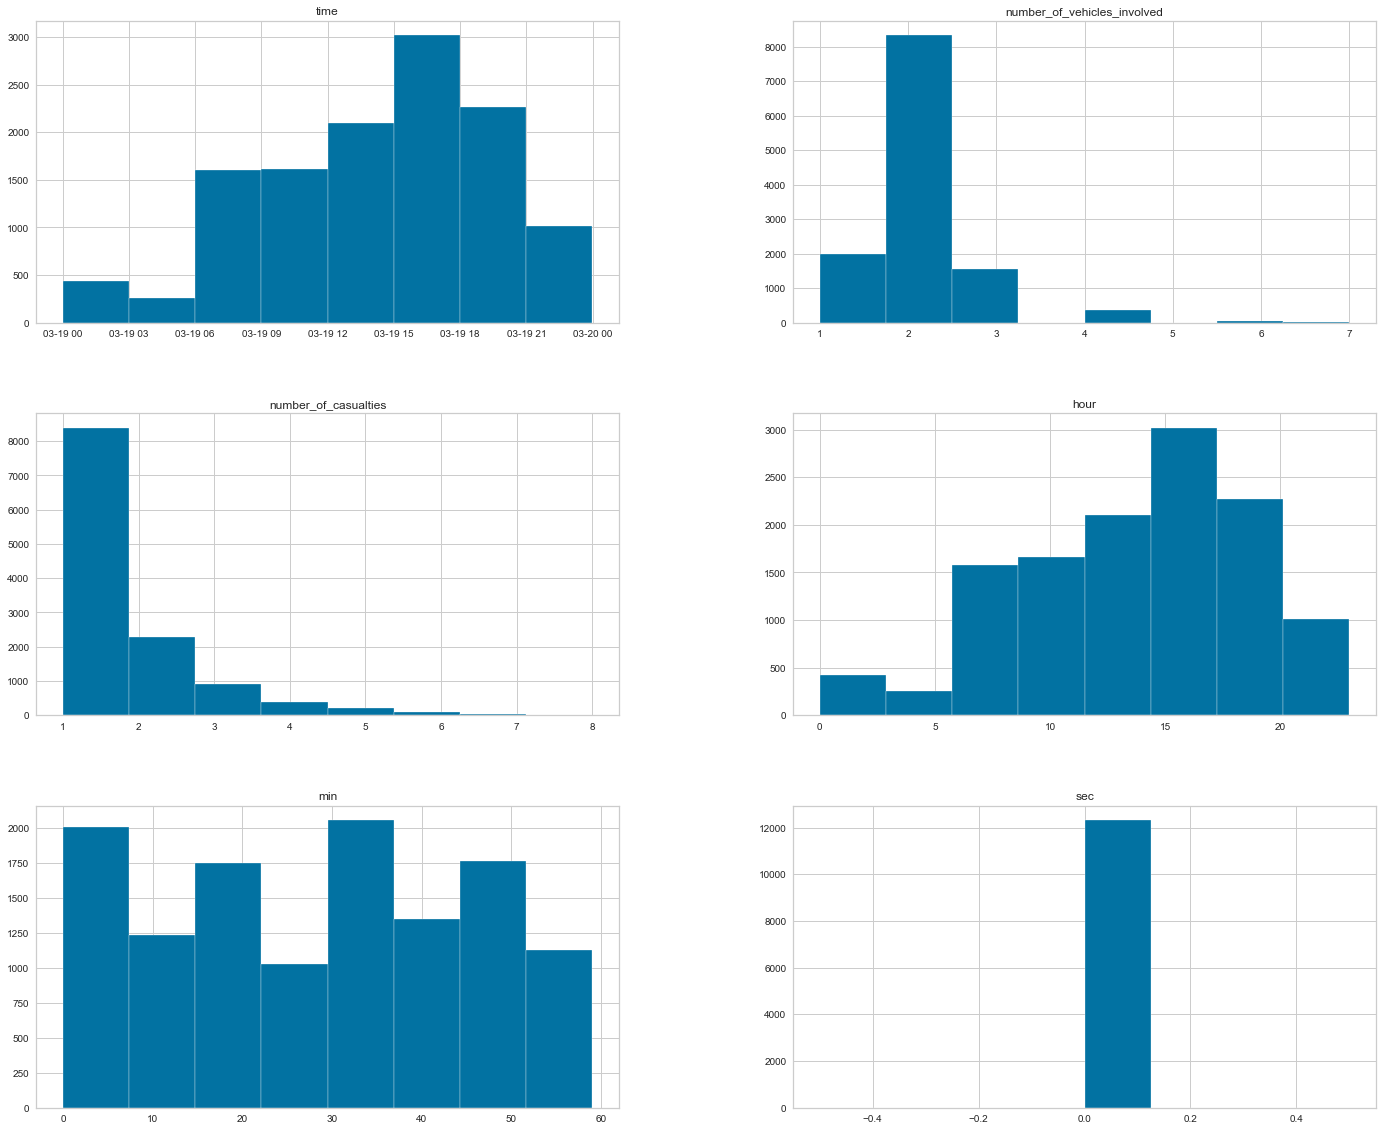

In [33]:
# checking the distribution 
plt.suptitle('Hist plots for the data set',bbox={'facecolor': '0.8', 'pad': 8}, fontsize=20)
df.hist(figsize=(24, 20), bins=8)
plt.show()

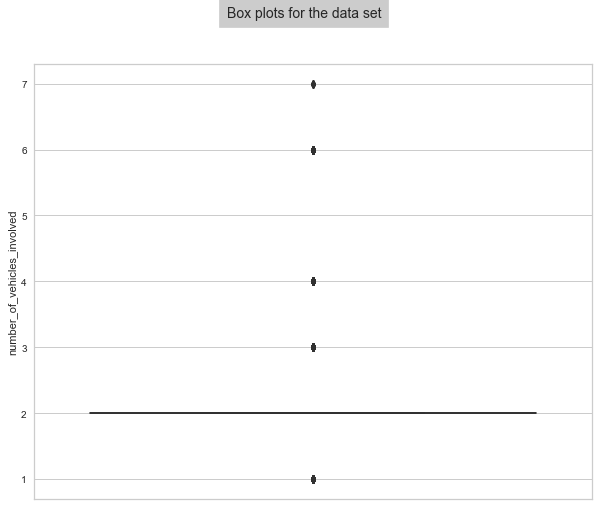

In [34]:
fig = plt.figure(figsize=(10,8))
sns.boxplot(data=df, y='number_of_vehicles_involved')
fig.suptitle('Box plots for the data set', bbox={'facecolor': '0.8', 'pad': 8}, fontsize=14)
plt.show()

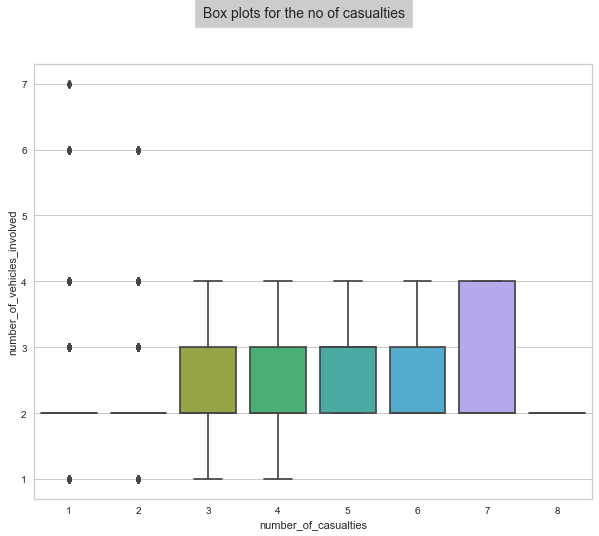

In [35]:
fig = plt.figure(figsize=(10,8))
sns.boxplot(data=df, y='number_of_vehicles_involved', x='number_of_casualties')
fig.suptitle('Box plots for the no of casualties', bbox={'facecolor': '0.8', 'pad': 8}, fontsize=14)
plt.show()

<a name = Section55></a>
### **5.5 Handling of Outliers**


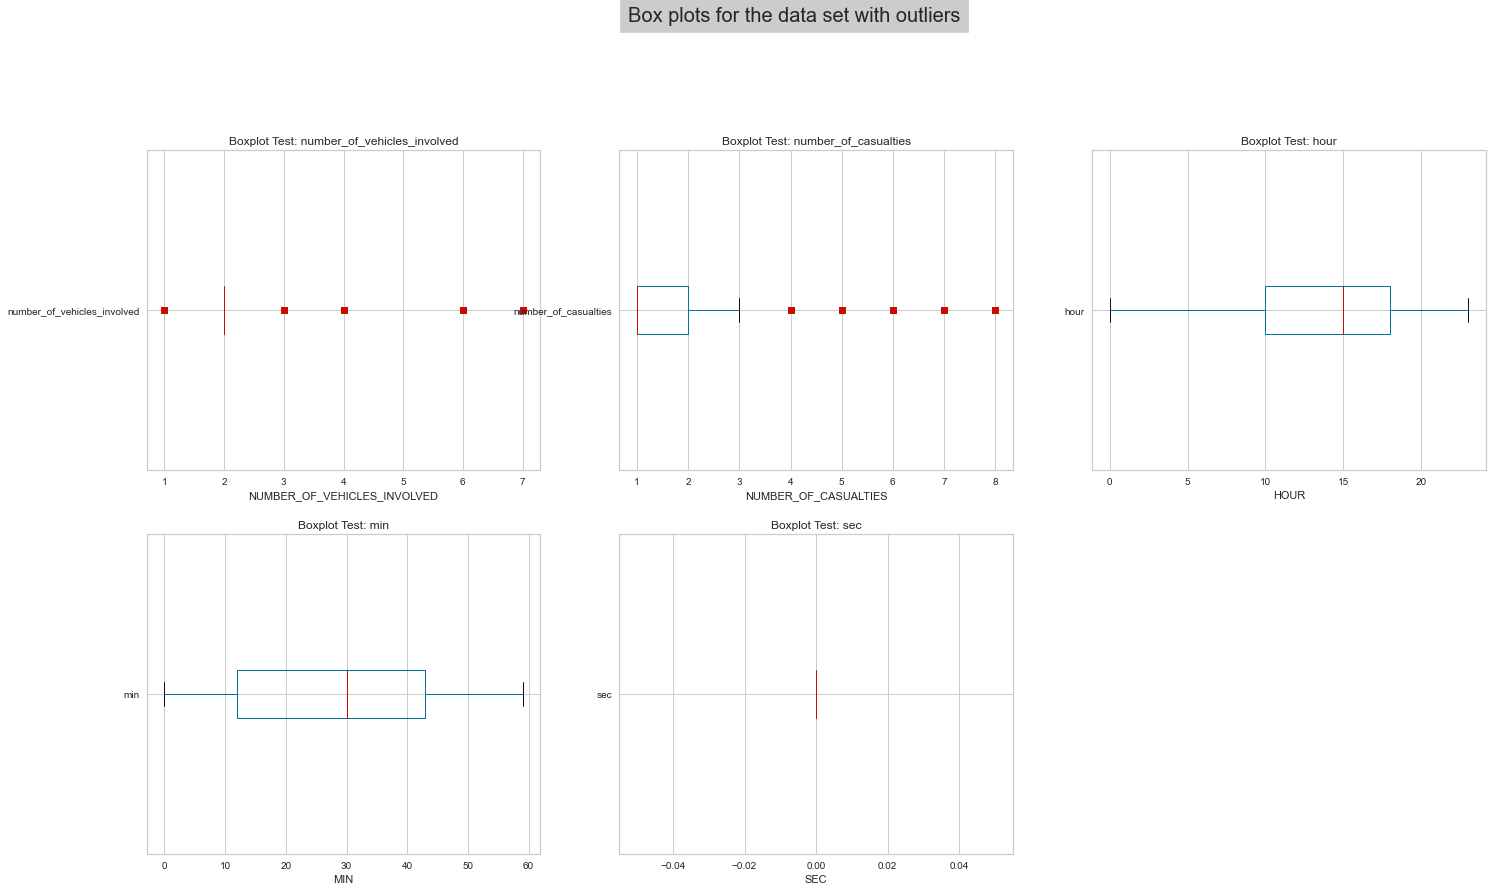

In [36]:
# for data
numcol = ['number_of_vehicles_involved', 'number_of_casualties', 'hour', 'min', 'sec']
fig = plt.figure(figsize=(24, 20))
fig.suptitle('Box plots for the data set with outliers',bbox={'facecolor': '0.8', 'pad': 8}, fontsize=20)
for predictor in numcol:
    ctrain_o = numcol.index(predictor)
    # print(cntss)
    subsc = fig.add_subplot(3,3, ctrain_o+1)
    subsc.set_xlabel(predictor.upper())
    # sns.boxplot(y=trainstay[predictor])
    df[predictor].plot.box(grid=True, layout=(4, 2), vert=False, sym='rs')
    subsc.title.set_text('Boxplot Test: ' + str(predictor))

In [37]:
# For testing  data 

for c in numcol:
    print(c)    
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)   
    IQR = Q3-Q1
    upper = Q3+1.5*IQR    
    lower = Q1-1.5*IQR
    print('Percentiles: 25th(Q1)=%.3f, 75th(Q3)=%.3f, IQR=%.3f' % (Q1, Q1, IQR))
    # Identify outliers
    outliers = [x for x in df[c] if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    #print(trainstay[c])         
    df[c][df[c]>=upper]=upper
    df[c][df[c]<=lower]=lower

number_of_vehicles_involved
Percentiles: 25th(Q1)=2.000, 75th(Q3)=2.000, IQR=0.000
Identified outliers: 3976
number_of_casualties
Percentiles: 25th(Q1)=1.000, 75th(Q3)=1.000, IQR=1.000
Identified outliers: 720
hour
Percentiles: 25th(Q1)=10.000, 75th(Q3)=10.000, IQR=8.000
Identified outliers: 0
min
Percentiles: 25th(Q1)=12.000, 75th(Q3)=12.000, IQR=31.000
Identified outliers: 0
sec
Percentiles: 25th(Q1)=0.000, 75th(Q3)=0.000, IQR=0.000
Identified outliers: 0


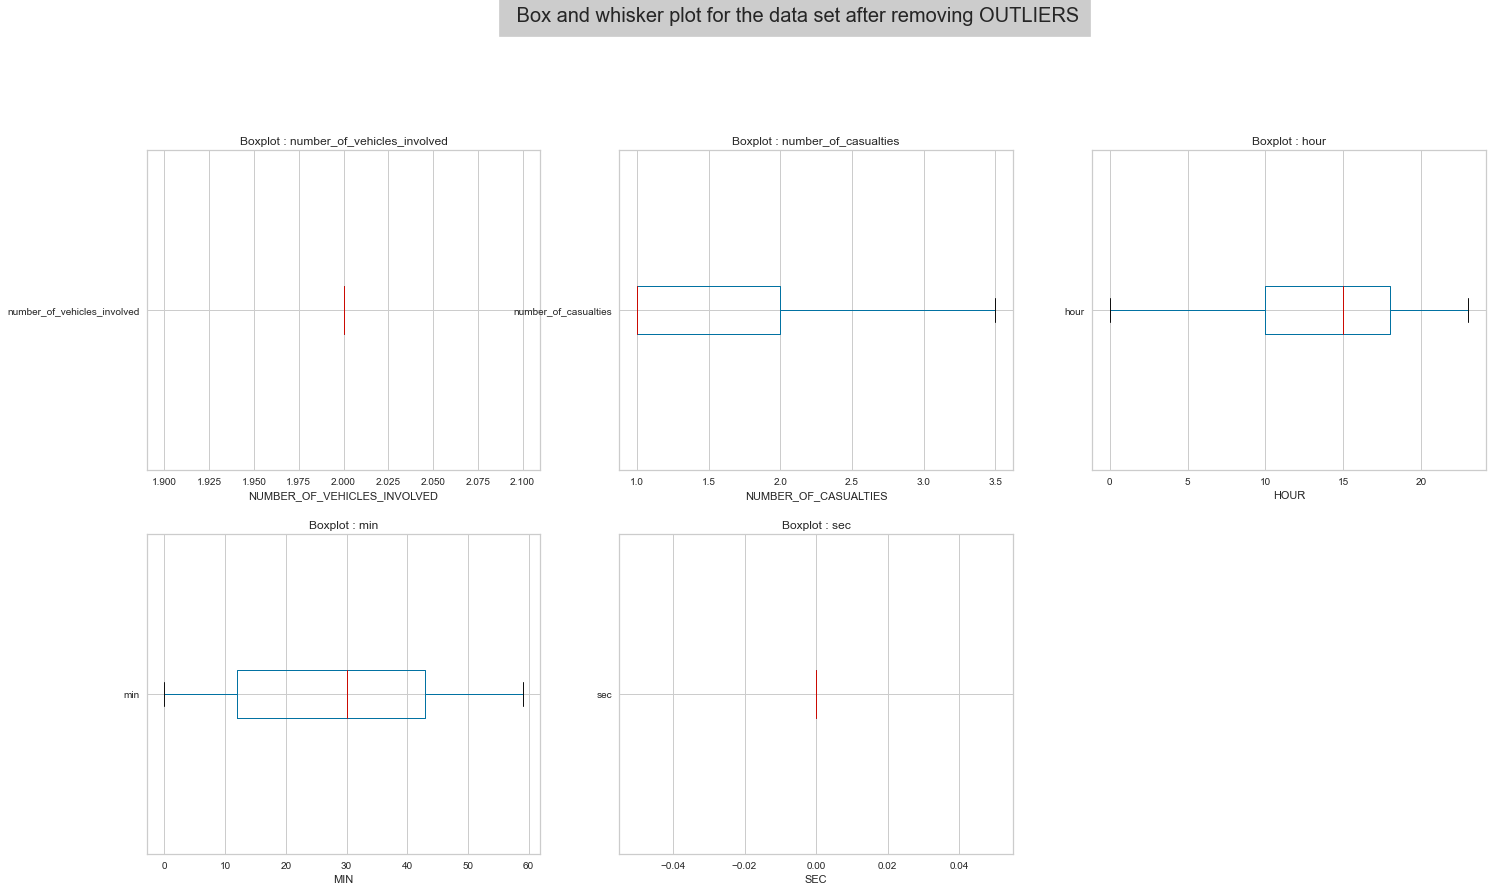

In [38]:
# for data
fig = plt.figure(figsize=(24, 20))
fig.suptitle(' Box and whisker plot for the data set after removing OUTLIERS', bbox={'facecolor':'0.8', 'pad':12}, fontsize = 20)
# Plotting scatter chart for each predictor vs the target variable
for predictor in numcol:
    ctrain = numcol.index(predictor)    
    #print(cntss)    
    subsc = fig.add_subplot(3, 3, ctrain+1)    
    subsc.set_xlabel(predictor.upper()) 
    #sns.boxplot(y=teststay[predictor])
    df[predictor].plot.box(grid=True, layout=(4, 2), vert = False, sym='rs')
    #plt.show(block=True)
    subsc.title.set_text('Boxplot : '+ str(predictor))  

<AxesSubplot:>

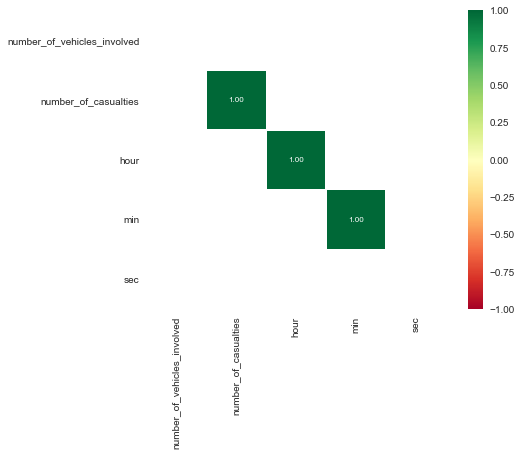

In [39]:
corr = df.drop('accident_severity', axis=1).corr()
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], annot=True, cmap='RdYlGn',
            vmax=1.0, vmin=-1.0, center=0, linewidth=0.1, annot_kws={'size': 8}, square=True, fmt='.2f',)

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

**NOTE**:  

- Exploratory Data Analysis will explore all the features and their relationship with other features
- Both non-graphical and graphical method will be used as applicable to respective features
- Both univariate and bivariate method be used as applicable to respective features

In [40]:
df['accident_severity'].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: accident_severity, dtype: int64

In [41]:
df.driving_experience.value_counts()

5-10yr        4192
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: driving_experience, dtype: int64

In [42]:
df.columns

Index(['time', 'day_of_week', 'age_band_of_driver', 'sex_of_driver',
       'educational_level', 'vehicle_driver_relation', 'driving_experience',
       'type_of_vehicle', 'owner_of_vehicle', 'service_year_of_vehicle',
       'defect_of_vehicle', 'area_accident_occured', 'lanes_or_medians',
       'road_allignment', 'types_of_junction', 'road_surface_type',
       'road_surface_conditions', 'light_conditions', 'weather_conditions',
       'type_of_collision', 'number_of_vehicles_involved',
       'number_of_casualties', 'vehicle_movement', 'casualty_class',
       'sex_of_casualty', 'age_band_of_casualty', 'casualty_severity',
       'work_of_casuality', 'fitness_of_casuality', 'pedestrian_movement',
       'cause_of_accident', 'accident_severity', 'hour', 'min', 'sec'],
      dtype='object')

In [43]:
df["educational_level"].value_counts()

Junior high school    8360
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: educational_level, dtype: int64

In [44]:
df.type_of_vehicle.value_counts()

Automobile              4155
Lorry_(41?100Q)         2186
Other                   1208
Pick_up_upto_10Q         811
Public_(12_seats)        711
Stationwagen             687
Lorry_(11?40Q)           541
Public_(13?45_seats)     532
Public_(>_45_seats)      404
Long_lorry               383
Taxi                     265
Motorcycle               177
Special_vehicle           84
Ridden_horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: type_of_vehicle, dtype: int64

In [45]:
df.age_band_of_driver.value_counts()

18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: age_band_of_driver, dtype: int64

In [46]:
df.describe()

,number_of_vehicles_involved,number_of_casualties,hour,min,sec
count,12316.0,12316.000000,12316.000000,12316.000000,12316.0
mean,2.0,1.479701,13.835823,27.696736,0.0
std,0.0,0.785161,5.202923,17.482604,0.0
min,2.0,1.000000,0.000000,0.000000,0.0
25%,2.0,1.000000,10.000000,12.000000,0.0
50%,2.0,1.000000,15.000000,30.000000,0.0
75%,2.0,2.000000,18.000000,43.000000,0.0
max,2.0,3.500000,23.000000,59.000000,0.0


In [47]:
# Get list of categorical variables,date  and numerical variables for the data set
fcatcol=[col for col in df.columns if df[col].dtype == "object"]
print("Categorical cols of dataset = ", catcol, ". No of categorical features = ", len(catcol))
fdatecol=[col for col in df.columns if df[col].dtype == "datetime64[ns]"]
print("DateTime cols of dataset = ", datecol, ". No of datetime features = ", len(datecol))
fnumcol = [col for col in df.columns if (df[col].dtype != "object") & (df[col].dtype != "datetime64[ns]")]
print("Numerical cols of dataset = ", numcol, ". No of numerical features = ", len(numcol))

Categorical cols of dataset =  ['day_of_week', 'age_band_of_driver', 'sex_of_driver', 'educational_level', 'vehicle_driver_relation', 'driving_experience', 'type_of_vehicle', 'owner_of_vehicle', 'service_year_of_vehicle', 'defect_of_vehicle', 'area_accident_occured', 'lanes_or_medians', 'road_allignment', 'types_of_junction', 'road_surface_type', 'road_surface_conditions', 'light_conditions', 'weather_conditions', 'type_of_collision', 'vehicle_movement', 'casualty_class', 'sex_of_casualty', 'age_band_of_casualty', 'casualty_severity', 'work_of_casuality', 'fitness_of_casuality', 'pedestrian_movement', 'cause_of_accident', 'accident_severity'] . No of categorical features =  29
DateTime cols of dataset =  ['time'] . No of datetime features =  1
Numerical cols of dataset =  ['number_of_vehicles_involved', 'number_of_casualties', 'hour', 'min', 'sec'] . No of numerical features =  5


Text(0.5, 0.98, "Histogram Plot['number_of_vehicles_involved', 'number_of_casualties', 'hour', 'min', 'sec']")

<Figure size 864x864 with 0 Axes>

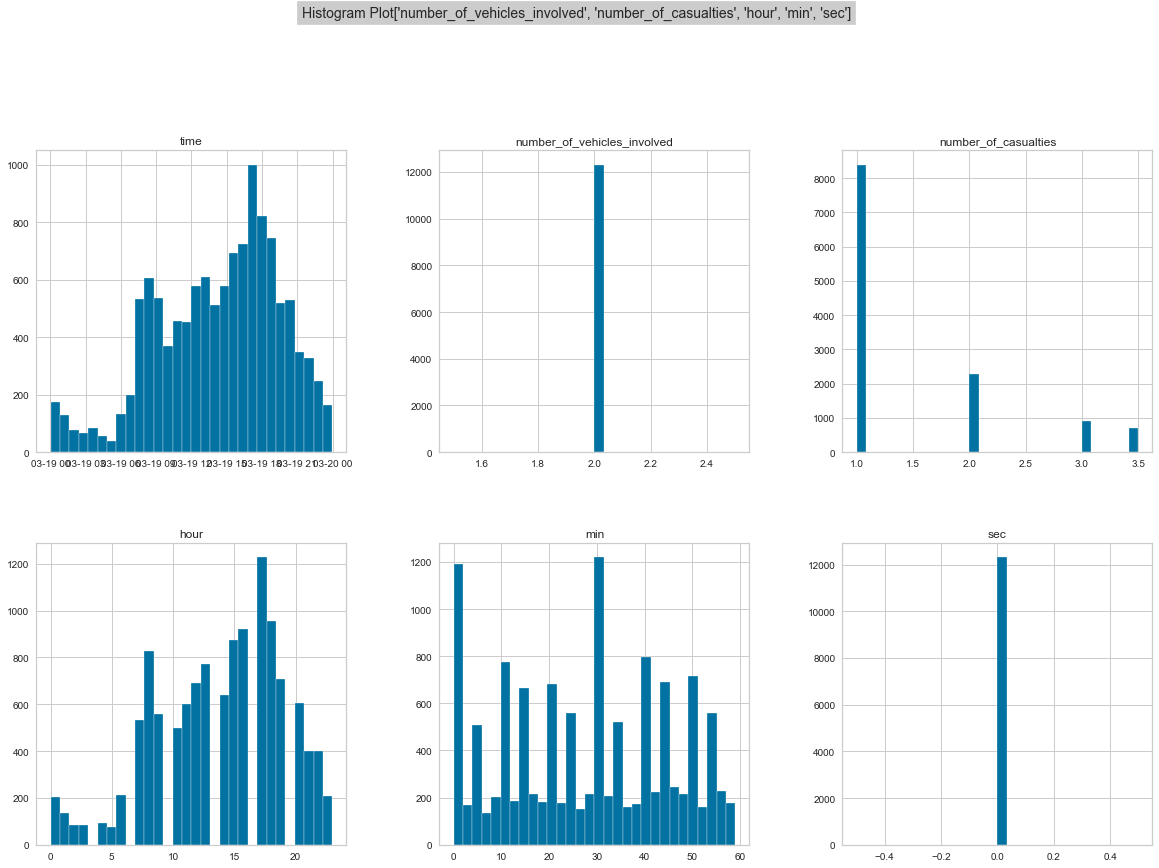

In [48]:
plt.figure(figsize=(12, 12))
df.hist(figsize=(20,20), grid=True, layout=(3,3), bins = 30)
plt.suptitle("Histogram Plot" + str(numcol), bbox={'facecolor':'0.8','pad':5},fontsize = 14)

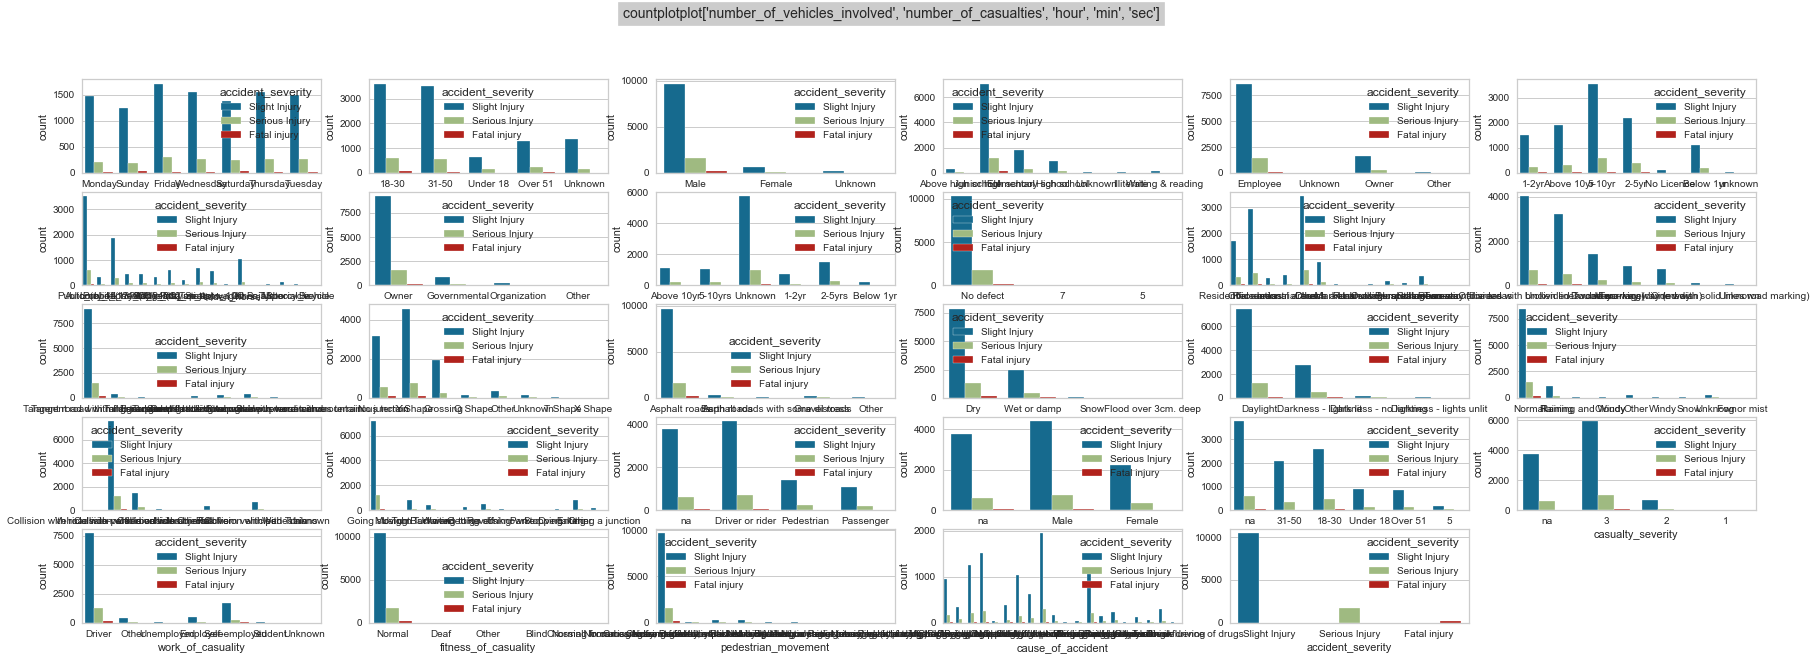

In [49]:
plt.figure(figsize=(30,10))
for i,feature in enumerate(fcatcol):
    plt.subplot(5,6,i+1)
    sns.countplot(df[feature],hue=df['accident_severity'])
    
plt.suptitle("countplotplot" + str(numcol), bbox={'facecolor':'0.8','pad':5},fontsize = 14)
plt.show()

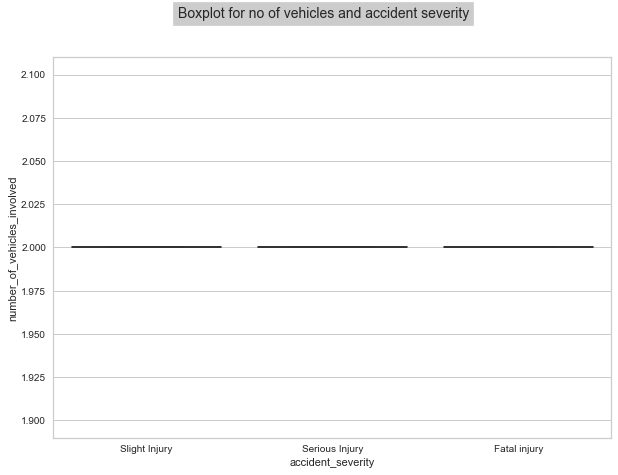

In [50]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, y='number_of_vehicles_involved', x='accident_severity')
plt.suptitle("Boxplot for no of vehicles and accident severity", bbox={'facecolor':'0.8','pad':5},fontsize = 14)
plt.show()

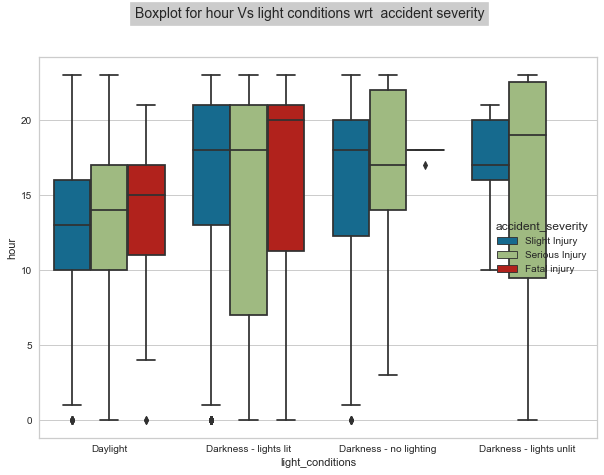

In [51]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, y='hour', x='light_conditions', hue = 'accident_severity')
plt.suptitle("Boxplot for hour Vs light conditions wrt  accident severity", bbox={'facecolor':'0.8','pad':5},fontsize = 14)
plt.show()

In [52]:
pd.crosstab(index=df['area_accident_occured'], columns=df['vehicle_movement'])

vehicle_movement,Entering a junction,Getting off,Going straight,Moving Backward,Other,Overtaking,Parked,Reversing,Stopping,Turnover,U-Turn,Unknown,Waiting to go
area_accident_occured,,,,,,,,,,,,,
Market areas,3,1,48,3,5,0,0,0,0,3,0,0,0
Recreational areas,8,17,197,37,28,2,1,17,6,11,0,3,0
Church areas,15,26,753,78,77,4,1,49,5,43,4,3,2
Hospital areas,0,1,100,10,7,1,0,2,0,0,0,0,0
Industrial areas,13,8,338,26,27,5,1,13,3,16,1,5,0
Outside rural areas,6,2,134,24,25,1,0,10,3,8,2,2,1
Office areas,48,82,2386,264,270,24,3,156,21,136,17,32,12
Other,51,114,2766,330,315,30,4,199,10,179,17,26,17
Recreational areas,0,0,1,0,0,0,0,0,0,0,0,0,0


<Figure size 720x504 with 0 Axes>

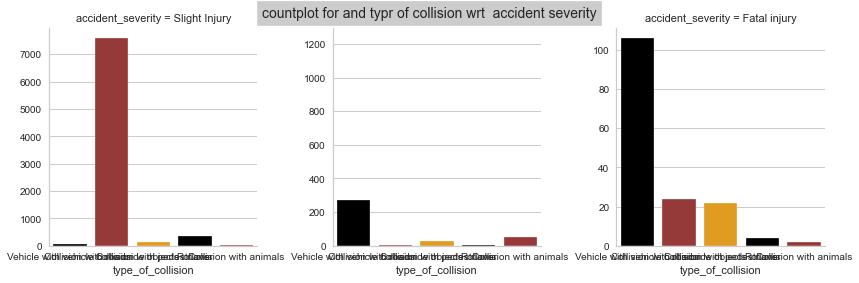

In [53]:
# creating a facet grid with columns 
plt.figure(figsize=(10,7))
grid = sns.FacetGrid(data=df, col='accident_severity', height=4, aspect=1, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'type_of_collision', palette=['black', 'brown', 'orange'])
plt.suptitle("countplot for and typr of collision wrt  accident severity", bbox={'facecolor':'0.8','pad':5},fontsize = 14)
plt.show()

<Figure size 720x504 with 0 Axes>

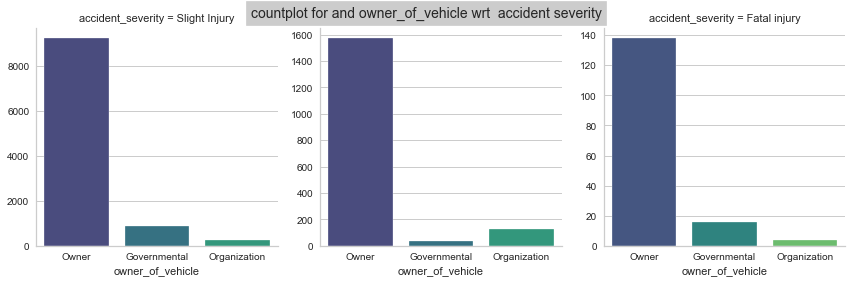

In [54]:
# creating a facet grid with columns 
plt.figure(figsize=(10,7))
grid = sns.FacetGrid(data=df, col='accident_severity', height=4, aspect=1, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'owner_of_vehicle', palette='viridis')
plt.suptitle("countplot for and owner_of_vehicle wrt  accident severity", bbox={'facecolor':'0.8','pad':5},fontsize = 14)
plt.show()

<Figure size 720x504 with 0 Axes>

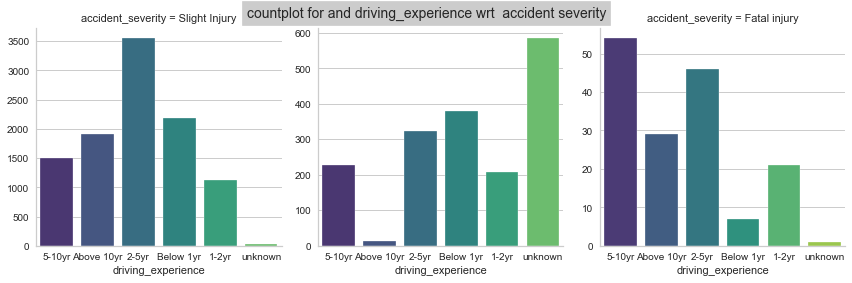

In [55]:
# creating a facet grid with columns 
plt.figure(figsize=(10,7))
grid = sns.FacetGrid(data=df, col='accident_severity', height=4, aspect=1, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'driving_experience', palette='viridis')
plt.suptitle("countplot for and driving_experience wrt  accident severity", bbox={'facecolor':'0.8','pad':5},fontsize = 14)
plt.show()

<Figure size 720x504 with 0 Axes>

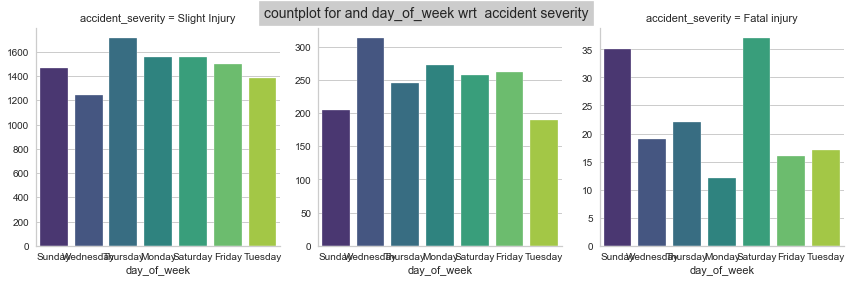

In [56]:
# creating a facet grid with columns 
plt.figure(figsize=(10,7))
grid = sns.FacetGrid(data=df, col='accident_severity', height=4, aspect=1, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'day_of_week', palette='viridis')
plt.suptitle("countplot for and day_of_week wrt  accident severity", bbox={'facecolor':'0.8','pad':5},fontsize = 14)
plt.show()

<Figure size 720x504 with 0 Axes>

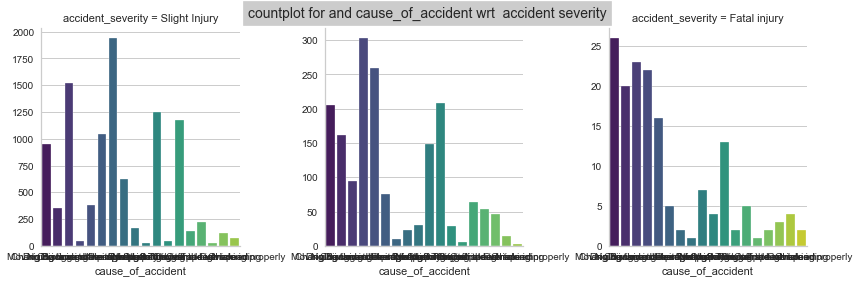

In [57]:
# creating a facet grid with columns 
plt.figure(figsize=(10,7))
grid = sns.FacetGrid(data=df, col='accident_severity', height=4, aspect=1, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'cause_of_accident', palette='viridis')
plt.suptitle("countplot for and cause_of_accident wrt  accident severity", bbox={'facecolor':'0.8','pad':5},fontsize = 14)
plt.show()

<Figure size 720x504 with 0 Axes>

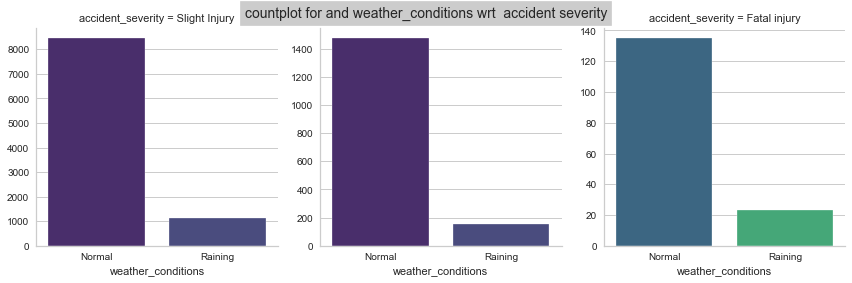

In [58]:
# creating a facet grid with columns 
plt.figure(figsize=(10,7))
grid = sns.FacetGrid(data=df, col='accident_severity', height=4, aspect=1, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'weather_conditions', palette='viridis')
plt.suptitle("countplot for and weather_conditions wrt  accident severity", bbox={'facecolor':'0.8','pad':5},fontsize = 14)
plt.show()

In [59]:
print("Number of casualty_severity: ", df[df['accident_severity']=='Fatal injury']['sex_of_driver'].value_counts())
print("Number of vehicle_driver_relation: ", df[df['vehicle_driver_relation']=='Employee']['sex_of_driver'].value_counts())

Number of casualty_severity:  Male       152
Female       5
Unknown      1
Name: sex_of_driver, dtype: int64
Number of vehicle_driver_relation:  Male       9471
Female      591
Unknown     144
Name: sex_of_driver, dtype: int64


In [60]:
df['fitness_of_casuality'].value_counts()

Normal          12243
NormalNormal       19
Blind              18
Other              18
Deaf               18
Name: fitness_of_casuality, dtype: int64

sns.pairplot(df,vars = ['number_of_vehicles_involved', 'number_of_casualties', 'hour', 'min', 'sec'],hue="accident_severity", dropna=True,markers=["o", "s"])
plt.title("Pair Plot wrt  accident severity", bbox={'facecolor':'0.8','pad':5},fontsize = 14)
#plt.title('Pair Plot')

<a name = Section7></a>

---
# **7. Data Post-Processing**

<a name = Section71></a>
### **7.1 Data Encoding**

- In this section, we will encode our categorical features as necessary and manipulate any column as necessary

In [61]:
df.columns

Index(['time', 'day_of_week', 'age_band_of_driver', 'sex_of_driver',
       'educational_level', 'vehicle_driver_relation', 'driving_experience',
       'type_of_vehicle', 'owner_of_vehicle', 'service_year_of_vehicle',
       'defect_of_vehicle', 'area_accident_occured', 'lanes_or_medians',
       'road_allignment', 'types_of_junction', 'road_surface_type',
       'road_surface_conditions', 'light_conditions', 'weather_conditions',
       'type_of_collision', 'number_of_vehicles_involved',
       'number_of_casualties', 'vehicle_movement', 'casualty_class',
       'sex_of_casualty', 'age_band_of_casualty', 'casualty_severity',
       'work_of_casuality', 'fitness_of_casuality', 'pedestrian_movement',
       'cause_of_accident', 'accident_severity', 'hour', 'min', 'sec'],
      dtype='object')

In [62]:
df.shape

(12316, 35)

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for a in fcatcol:    
    df[a]= le.fit_transform(df[a])

In [64]:
df.head()

,time,day_of_week,age_band_of_driver,sex_of_driver,educational_level,vehicle_driver_relation,driving_experience,type_of_vehicle,owner_of_vehicle,service_year_of_vehicle,defect_of_vehicle,area_accident_occured,lanes_or_medians,road_allignment,types_of_junction,road_surface_type,road_surface_conditions,light_conditions,weather_conditions,type_of_collision,number_of_vehicles_involved,number_of_casualties,vehicle_movement,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,work_of_casuality,fitness_of_casuality,pedestrian_movement,cause_of_accident,accident_severity,hour,min,sec
0,2022-03-19 17:02:00,1,0,1,0,0,0,0,3,3,2,9,2,5,1,0,0,3,2,3,2,2.0,2,3,2,5,3,0,2,5,9,2,17,2,0
1,2022-03-19 17:02:00,1,1,1,4,0,3,11,3,2,2,6,4,5,1,0,0,3,2,8,2,2.0,2,3,2,5,3,0,2,5,16,2,17,2,0
2,2022-03-19 17:02:00,1,0,1,4,0,0,5,3,5,2,1,6,5,1,0,0,3,2,2,2,2.0,2,0,1,1,2,0,2,5,0,1,17,2,0
3,2022-03-19 01:06:00,3,0,1,4,0,2,11,0,5,2,6,6,6,7,2,0,0,2,8,2,2.0,2,2,0,0,2,0,2,5,1,2,1,6,0
4,2022-03-19 01:06:00,3,0,1,4,0,1,0,3,2,2,4,6,5,7,0,0,0,2,8,2,2.0,2,3,2,5,3,0,2,5,16,2,1,6,0


In [65]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vartrain = df[['number_of_vehicles_involved', 'number_of_casualties', 'hour', 'min', 'sec']]
vif = pd.DataFrame()
vif['features'] = vartrain.columns
vif['VIF'] = [variance_inflation_factor(
    vartrain.values, i) for i in range(vartrain.shape[1])]
vif

,features,VIF
0,number_of_vehicles_involved,14.116288
1,number_of_casualties,1.001946
2,hour,1.004535
3,min,1.002854
4,sec,NaN


In [66]:
vartrain = df[['number_of_casualties', 'hour', 'min']]
vif = pd.DataFrame()
vif['features'] = vartrain.columns
vif['VIF'] = [variance_inflation_factor(
    vartrain.values, i) for i in range(vartrain.shape[1])]
vif

,features,VIF
0,number_of_casualties,3.568790
1,hour,4.021091
2,min,2.797608


In [68]:
finalnumcol =['number_of_casualties', 'hour', 'number_of_vehicles_involved']

In [100]:
X = df.drop(columns = ['accident_severity', 'educational_level', 'vehicle_driver_relation',
        'owner_of_vehicle', 'service_year_of_vehicle','sex_of_driver',
       'defect_of_vehicle',  'road_allignment', 'types_of_junction', 'road_surface_type',
       'road_surface_conditions', 'light_conditions', 'weather_conditions',
       'type_of_collision',  'vehicle_movement', 'casualty_class',
       'sex_of_casualty', 'age_band_of_casualty', 'casualty_severity',
       'work_of_casuality', 'fitness_of_casuality', 'pedestrian_movement','sec','time',
       'min'], axis = 1)
X.head()

,day_of_week,age_band_of_driver,driving_experience,type_of_vehicle,area_accident_occured,lanes_or_medians,number_of_vehicles_involved,number_of_casualties,cause_of_accident,hour
0,1,0,0,0,9,2,2,2.0,9,17
1,1,1,3,11,6,4,2,2.0,16,17
2,1,0,0,5,1,6,2,2.0,0,17
3,3,0,2,11,6,6,2,2.0,1,1
4,3,0,1,0,4,6,2,2.0,16,1


In [101]:
y = df['accident_severity']
print(y.isna().sum())
y.head()

0


0    2
1    2
2    1
3    2
4    2
Name: accident_severity, dtype: int32

In [102]:
X.columns

Index(['day_of_week', 'age_band_of_driver', 'driving_experience',
       'type_of_vehicle', 'area_accident_occured', 'lanes_or_medians',
       'number_of_vehicles_involved', 'number_of_casualties',
       'cause_of_accident', 'hour'],
      dtype='object')

In [103]:
num_feats = 10

In [104]:
print(X.shape,y.shape)

(12316, 10) (12316,)


In [105]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

6 selected features


In [106]:
print(str(len(embeded_rf_feature)), 'selected features')

6 selected features


In [107]:
print( 'selected features',embeded_rf_feature)

selected features ['day_of_week', 'driving_experience', 'type_of_vehicle', 'area_accident_occured', 'cause_of_accident', 'hour']


In [108]:
features_select = X[['hour','day_of_week','number_of_casualties','cause_of_accident',
                     'number_of_vehicles_involved','type_of_vehicle','age_band_of_driver','area_accident_occured',
                     'driving_experience', 'lanes_or_medians']]

In [109]:
from sklearn.feature_selection import SelectFromModel               # To select features from model using Yellow bricks
from yellowbrick.model_selection import FeatureImportances 
from sklearn.ensemble import RandomForestClassifier   

# Have some patience, may take some time :)
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(feature_select, y)

# Extracting list of important features
selected_feat = feature_select.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Features:', selected_feat)

NameError: name 'feature_select' is not defined

In [ ]:
#Visualization of Important Features:
figure = plt.figure(figsize = [20, 12])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(feature_select, y)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()


<a name = Section72></a>
### **7.2 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development using holdout validation technique.

In [110]:
# Splitting data into training and testing sets with Test Data as 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (9237, 10)
y_train shape:  (9237,)
X_test shape:  (3079, 10)
y_test shape:  (3079,)


In [111]:
X_train.head()

,day_of_week,age_band_of_driver,driving_experience,type_of_vehicle,area_accident_occured,lanes_or_medians,number_of_vehicles_involved,number_of_casualties,cause_of_accident,hour
36,0,0,0,15,6,0,2,2.0,12,20
6693,5,1,0,14,7,2,2,1.0,3,20
4112,0,1,3,0,6,2,2,1.0,11,18
7420,6,0,3,7,2,2,2,1.0,5,9
2249,1,1,2,0,5,4,2,3.5,12,14


In [112]:
y.head()

0    2
1    2
2    1
3    2
4    2
Name: accident_severity, dtype: int32

In [113]:
# Get count of each class
np.bincount(y)

array([  158,  1743, 10415], dtype=int64)

<a name = Section73></a>
### **7.3 Data Scaling**

- Now, evaluating model with help of scaling the data.

In [114]:
sc = StandardScaler()
X_train[finalnumcol] = sc.fit_transform(X_train[finalnumcol])

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop a Logistic Regression model**

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **Accuracy Score** score as required by this project.

<a name = Section81></a>
### **8.1 Baseline Model Development & Evaluation**

- Here we will develop Logistic Regression classification model using default setting.

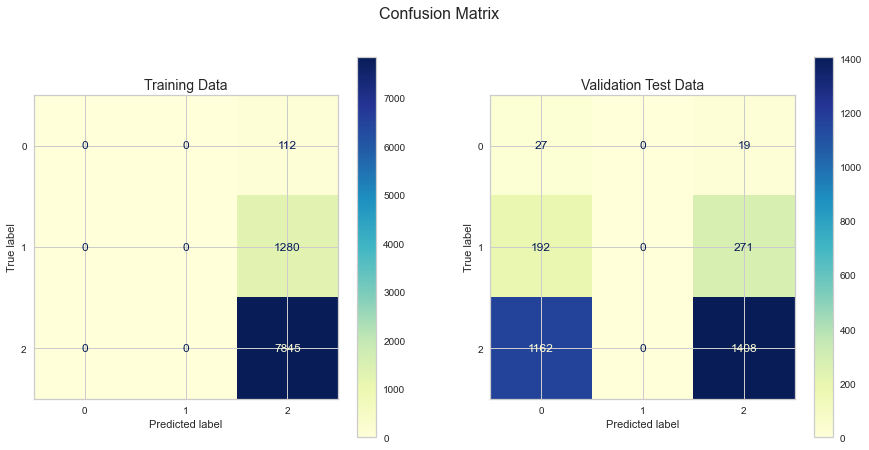

In [115]:
# Instantiate a Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

# Predicting training and testing labels
y_train_pred_count = logreg.predict(X_train)
y_test_pred_count = logreg.predict(X_test)

# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=logreg, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=logreg, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Training Data', size=14)
ax2.set_title(label='Validation Test Data', size=14)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

In [139]:
X_train.columns

Index(['day_of_week', 'age_band_of_driver', 'driving_experience',
       'type_of_vehicle', 'area_accident_occured', 'lanes_or_medians',
       'number_of_vehicles_involved', 'number_of_casualties',
       'cause_of_accident', 'hour'],
      dtype='object')

In [116]:
# Get count of each class
np.bincount(y_train)

array([ 112, 1280, 7845], dtype=int64)

In [117]:
# Get count of each class
np.bincount(y_test)

array([  46,  463, 2570], dtype=int64)

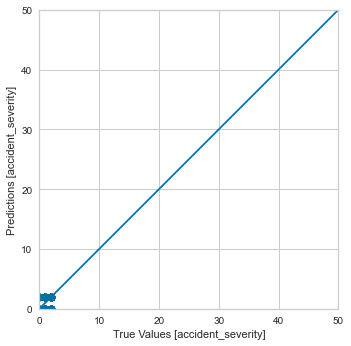

In [118]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_test_pred_count)
plt.xlabel('True Values [accident_severity]')
plt.ylabel('Predictions [accident_severity]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [119]:
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_test_pred_count))

In [120]:
confusion_matrix.index = ['Actual 0','Actual 1','Actual 2' ]
confusion_matrix.columns = ['Predicted 0','Predicted 1','Predicted 2']
print(confusion_matrix)

          Predicted 0  Predicted 1  Predicted 2
Actual 0           27            0           19
Actual 1          192            0          271
Actual 2         1162            0         1408


In [121]:
print('Accuracy score for test validation data is:', accuracy_score(y_test,y_test_pred_count))

Accuracy score for test validation data is: 0.46606040922377395


In [122]:
train_report = classification_report(y_train, y_train_pred_count)
test_report = classification_report(y_test, y_test_pred_count)
print('                    Training Data Report          ')
print(train_report)
print('                    Test Validation Data Report           ')
print(test_report)

                    Training Data Report          
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       112
           1       0.00      0.00      0.00      1280
           2       0.85      1.00      0.92      7845

    accuracy                           0.85      9237
   macro avg       0.28      0.33      0.31      9237
weighted avg       0.72      0.85      0.78      9237

                    Test Validation Data Report           
              precision    recall  f1-score   support

           0       0.02      0.59      0.04        46
           1       0.00      0.00      0.00       463
           2       0.83      0.55      0.66      2570

    accuracy                           0.47      3079
   macro avg       0.28      0.38      0.23      3079
weighted avg       0.69      0.47      0.55      3079



In [123]:
# Class count
count_class_0, count_class_1,count_class_2 = df['accident_severity'].value_counts()

# Divide by class
df_class_0 = df[df['accident_severity'] == 0]
df_class_1 = df[df['accident_severity'] == 1]
df_class_2 = df[df['accident_severity'] == 2]

In [124]:
df['accident_severity'].value_counts()

2    10415
1     1743
0      158
Name: accident_severity, dtype: int64

<a name = Section82></a>
### **8.2 SMOTE Oversampling for Multi-Class Classification**

- SMOTE Oversampling for Multi-Class Classification

Class=2, n=10415 (33.333%)
Class=1, n=10415 (33.333%)
Class=0, n=10415 (33.333%)


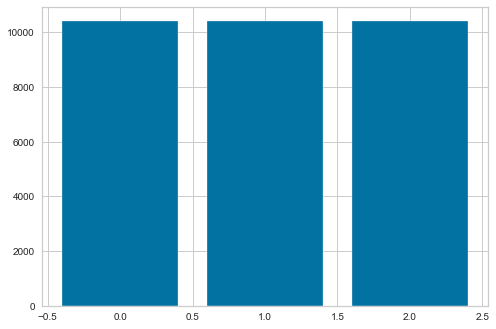

In [125]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k, v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [126]:
# K Fold
kf = KFold(shuffle=True, n_splits=8)
cv_results_kfold = cross_val_score(logreg,X_train, y_train, cv=kf, scoring='accuracy')
print(cv_results_kfold)

# Stratified K fold
skf = StratifiedKFold(shuffle=True, n_splits=8)
cv_results_skfold = cross_val_score(logreg, X_train, y_train, cv=skf, scoring='accuracy')
print(cv_results_skfold)

[0.84069264 0.86580087 0.85281385 0.84069264 0.83896104 0.84315425
 0.86741768 0.84488735]
[0.84935065 0.84935065 0.84935065 0.84935065 0.84935065 0.8492201
 0.8492201  0.8492201 ]


<a name = Section9></a>

---
# **9. Hyperparameter Tuning**
---

- In this section we will **tune the models**

- Then we will **analyze the results to obtain max accuracy** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **Accuracy Score** score as required by this project.

In [127]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[21:25:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 78.73%


In [128]:
# K Fold
kf = KFold(shuffle=True, n_splits=5)
cv_results_kfold = cross_val_score(logreg,X_train, y_train, cv=kf, scoring='accuracy')
print(cv_results_kfold)

# Stratified K fold
skf = StratifiedKFold(shuffle=True, n_splits=5)
cv_results_skfold = cross_val_score(logreg, X_train, y_train, cv=skf, scoring='accuracy')
print(cv_results_skfold)

[0.8452381  0.85930736 0.87005956 0.8332431  0.83865728]
[0.84902597 0.84902597 0.84948565 0.84948565 0.84948565]


**NOTE**: 
We can start off by tuning the number of neighbors for KNN. The default number of neighbors
is 7. Below we try all odd values of k from 1 to 21, covering the default value of 7. Each k value
is evaluated using 10-fold cross validation on the training standardized dataset

In [129]:
num_folds = 10
seed = 7
scoring = 'accuracy'
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.849195 using {'n_neighbors': 17}
0.750353 (0.017539) with: {'n_neighbors': 1}
0.810871 (0.014944) with: {'n_neighbors': 3}
0.834040 (0.015181) with: {'n_neighbors': 5}
0.843024 (0.013616) with: {'n_neighbors': 7}
0.845297 (0.012106) with: {'n_neighbors': 9}
0.845730 (0.011765) with: {'n_neighbors': 11}
0.848221 (0.011868) with: {'n_neighbors': 13}
0.848654 (0.012111) with: {'n_neighbors': 15}
0.849195 (0.012007) with: {'n_neighbors': 17}
0.849087 (0.011931) with: {'n_neighbors': 19}
0.849086 (0.011725) with: {'n_neighbors': 21}


Another way that we can improve the performance of algorithms on this problem is by using
ensemble methods. In this section we will evaluate four different ensemble machine learning
algorithms, two boosting and two bagging methods:
- Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
- Bagging Methods: Random Forests (RF) and Extra Trees (ET).

In [130]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


AB: 0.848870 (0.011479)
GBM: 0.848978 (0.012589)
RF: 0.848004 (0.011850)
ET: 0.842699 (0.013379)


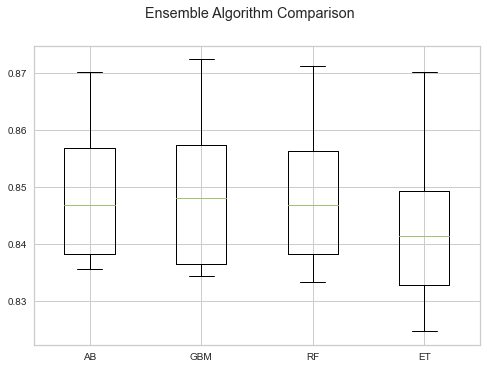

In [131]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [132]:
models = SVC(C=1.5)
models.fit(X_train, y_train)
ypredictions = models.predict(X_test)
print(accuracy_score(y_test, ypredictions))
#print(confusion_matrix(y_test, ypredictions))
print(classification_report(y_test, ypredictions))


0.834686586554076
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.00      0.00      0.00       463
           2       0.83      1.00      0.91      2570

    accuracy                           0.83      3079
   macro avg       0.28      0.33      0.30      3079
weighted avg       0.70      0.83      0.76      3079



<a name = Section10></a>

---
# **10. Summary**
---


**Observations:**

- There is a slight increase in the accuracy  from 82% to 84%.

In [133]:
import joblib
#joblib.dump(logreg,'../model/logreg.pkl')

In [134]:
# save the model
joblib.dump(logreg,'../model/model.pkl')

['../model/model.pkl']

In [135]:
logreg_clf = joblib.load('../model/model.pkl')
logreg_clf.predict(X_test)

array([2, 2, 0, ..., 0, 2, 0])

In [136]:
X_sample = X_train.sample(100)
X_sample

,day_of_week,age_band_of_driver,driving_experience,type_of_vehicle,area_accident_occured,lanes_or_medians,number_of_vehicles_involved,number_of_casualties,cause_of_accident,hour
11281,1,0,2,13,6,2,0.0,-0.609156,1,0.223505
4569,2,0,2,0,7,2,0.0,-0.609156,12,-0.162458
6502,6,4,2,0,7,2,0.0,-0.609156,13,-1.127364
11109,6,1,3,7,9,2,0.0,-0.609156,1,0.416486
5327,6,2,3,5,2,0,0.0,-0.609156,12,-0.741402
2729,2,0,2,7,7,2,0.0,-0.609156,1,-1.513327
8086,3,0,2,5,6,4,0.0,-0.609156,3,-0.741402
8900,5,1,2,3,6,2,0.0,-0.609156,1,0.609467
2203,6,1,3,12,1,2,0.0,-0.609156,1,0.995430
10336,4,0,3,8,7,2,0.0,-0.609156,3,-0.162458


In [137]:
X_test_sample  = X_test.sample(100)
X_test_sample

,day_of_week,age_band_of_driver,driving_experience,type_of_vehicle,area_accident_occured,lanes_or_medians,number_of_vehicles_involved,number_of_casualties,cause_of_accident,hour
7103,6,0,0,0,6,4,2,1.0,10,21
12157,4,0,2,3,6,2,2,1.0,0,19
3817,2,4,2,0,7,2,2,1.0,12,22
7784,6,0,3,5,7,2,2,1.0,9,0
8460,3,1,1,0,7,4,2,3.5,1,4
8520,5,0,4,0,7,4,2,1.0,3,11
6746,3,1,2,11,7,2,2,1.0,10,22
8216,0,1,1,3,6,2,2,3.0,9,20
3210,6,4,3,7,2,4,2,1.0,0,8
11248,0,1,2,0,6,2,2,1.0,0,11


<a name = Section9></a>

---
# **11. Explainable AI**
---

- In this section we will **use AI with the model**

In [138]:
shap.initjs()
shap_values = shap.TreeExplainer(model).shap_values(X_test_sample)

AssertionError: Model has no `estimators_`! Have you called `model.fit`?

In [ ]:
shap.summary_plot(shap_values, X_test_sample, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values, X_test_sample, max_display=30)

In [ ]:
print(shap_values)

In [ ]:
shap.initjs()
shap.force_plot(shap.TreeExplainer(model).expected_value[0], shap_values[0][:], X_test_sample)

In [ ]:
y_hat = model.predict(X_test._get_numeric_data())
print(y_hat[50])

In [ ]:
shap.initjs()
shap.force_plot(shap.TreeExplainer(model).expected_value[0], shap_values[1][50], X_test_sample.iloc[50])

In [ ]:
shap.initjs()
i=13
print(y_pred[i])
shap.force_plot(shap.TreeExplainer(model).expected_value[0], shap_values[0][i], X_test_sample.values[i], feature_names = X_test_sample.columns)

In [ ]:
print(y_pred[10])
row = 10
shap.waterfall_plot(shap.Explanation(values = shap_values[0][row], 
       base_values=shap.TreeExplainer(model).expected_value[0], data=X_test_sample.iloc[row],  
                                         feature_names=X_test_sample.columns.tolist()))

In [ ]:
shap.dependence_plot('type_of_vehicle', shap_values[2], X_test_sample)

In [ ]:
shap.dependence_plot('light_conditions', shap_values[2], X_test_sample)

In [ ]:
X_test_sample.shape

In [ ]:
print(y_pred[10])
shap.decision_plot(shap.TreeExplainer(model).expected_value[0], 
                   shap_values[2][:10], 
                   feature_names=X_test_sample.columns.tolist())

In [ ]:
shap.plots.heatmap(shap.TreeExplainer(model, data=X_test_sample)(X_test_sample[10][:10]), max_display=14)